# Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing

In [ ]:
testing_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = testing_set.class_names
print(class_name)

# Loading Model

In [ ]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

## Visualising and Performing Prediction on Single image

In [ ]:
import cv2

#Test Image Visualization


#image_path = r'C:\Users\bot\Desktop\googleClassroom\test\Potato___healthy\1f9870b3-899e-46fb-98c9-cfc2ce92895b___RS_HL 1816.jpg'
image_path = r'C:\Users\bot\Desktop\googleClassroom\test\Potato___healthy\c6abf1da-b06f-4cd2-8af6-d68be5eff6f9___RS_HL 1766.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = input_arr / 255.0  # Normalize pixel values 
input_arr = np.expand_dims(input_arr, axis=0)  # batch dimension ကိုထည့်ပေးတာဖြစ်ပါတယ်။ (batch, height, width, channels)
predictions = cnn.predict(input_arr) # shape: (1, 128, 128, 3)

In [ ]:
print(predictions)

In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

In [ ]:
actual_class = image_path.split("\\")[-2]  # Extract actual class from the image path
predicted_class = class_name[result_index]
confidence_score = np.max(predictions)
accuracy_score = confidence_score * 100

plt.imshow(img)
plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {accuracy_score:.2f}%")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict all test data
y_true = []
y_pred = []

for images, labels in testing_set:  # test_dataset is a tf.data.Dataset
    predictions = cnn.predict(images)
    
    y_true.extend(np.argmax(labels.numpy(), axis=1)) #row-wise max (မျှော်မှန်းထားတဲ့ label) 
    y_pred.extend(np.argmax(predictions, axis=1)) # row-wise max (ခန့်မှန်းထားတဲ့ label)

# Step 2: Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 3: Plot using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

1/1 [==============================] - 0s 30ms/step


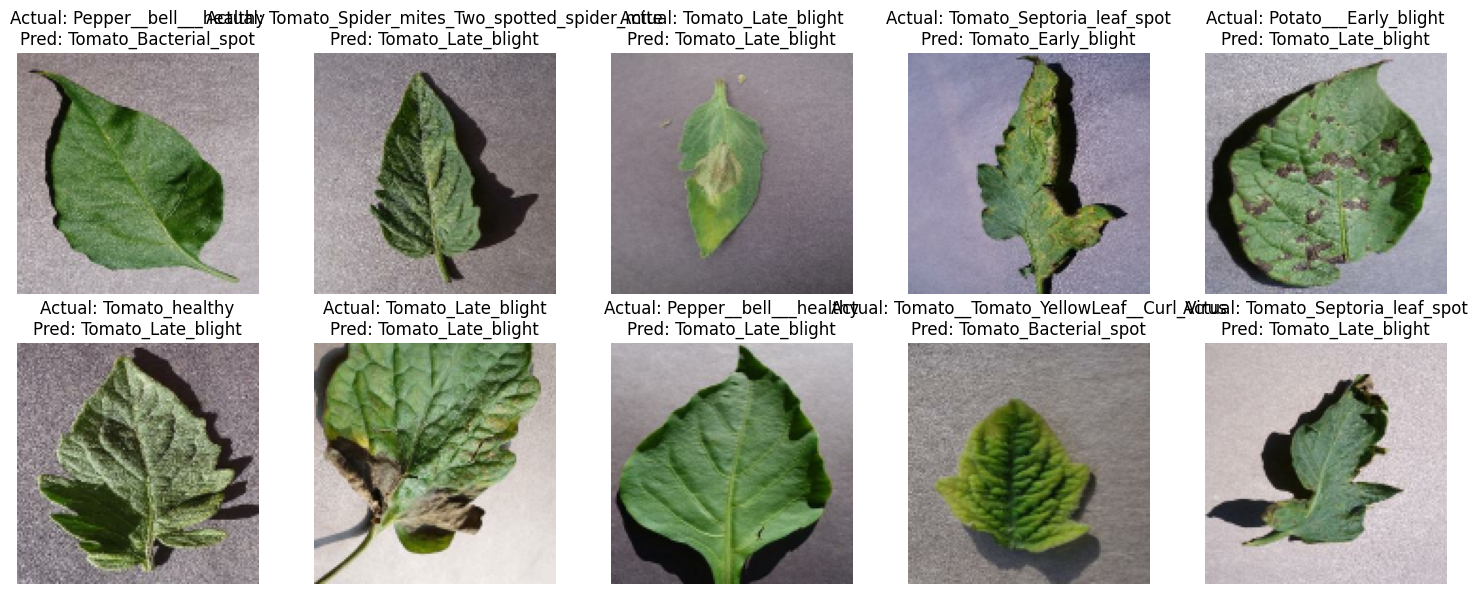

In [43]:
import random

# Pick 10 random indices
indices = random.sample(range(len(test_labels)), 10)
# indices မှာ random ရွေးထားတဲ့ 10 ခု index ရှိတယ်
# Prepare plot
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

# Convert dataset to list for easy easy indexing
test_images = []
test_labels = []

for images, labels in testing_set:
    test_images.extend(images.numpy())
    test_labels.extend(labels.numpy())

test_images = np.array(test_images)
test_labels = np.array(test_labels)
# Plot each random image
for i, idx in enumerate(indices): # i သည် subplot index (0 to 9), idx သည် testing dataset ထဲက true index
    image = test_images[idx].astype("uint8") # imshow သည် uint8 format ကိုလိုအပ်လို့ဖြစ်ပါတယ်။
    label = np.argmax(test_labels[idx]) # label ကို one-hot encoding ထဲက index ကိုပြောင်းထားတာဖြစ်ပါတယ်။

    input_img = np.expand_dims(test_images[idx] / 255.0, axis=0) # expand_dims သည် batch dimension ကိုထည့်ပေးတာဖြစ်ပါတယ်။ (batch, height, width, channels)
    # CNN မှာ predict လုပ်တဲ့အခါ input shape သည် (1, 128, 128, 3) ဖြစ်ရမယ်။
    # 128x128 RGB image တစ်ခုကို batch size 1 နဲ့ predict
    prediction = cnn.predict(input_img)
    pred_label = np.argmax(prediction)

    axes[i].imshow(image)
    axes[i].set_title(f"Actual: {class_name[label]}\nPred: {class_name[pred_label]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 28ms/step


<Figure size 640x480 with 0 Axes>